<a href="https://colab.research.google.com/github/eemmy2547/229352/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [10]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [11]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [12]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [13]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

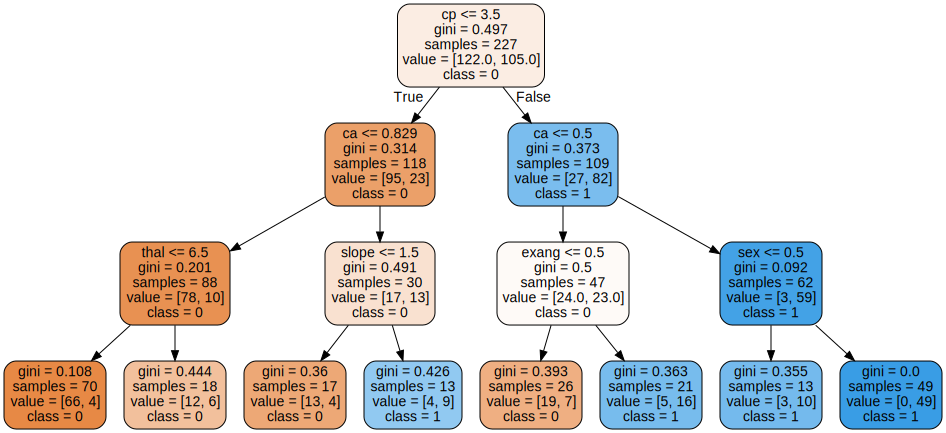

In [14]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [15]:
data.columns[:-1]

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [16]:
clf = DecisionTreeClassifier()

In [17]:
from sklearn.metrics import classification_report
bagged_trees = BaggingClassifier(
    estimator=clf, n_estimators=100, max_samples=0.8
    )
bagged_trees.fit(X_train, y_train)
print(classification_report(y_test, bagged_trees.predict(X_test)))
# ใช้เทคนิค Bagging (Bootstrap Aggregating) เพื่อสร้างโมเดล ensemble โดยการรวมผลลัพธ์จากโมเดลย่อยหลายๆ โมเดล (ในที่นี้คือ 100 โมเดล) เพื่อปรับปรุงความแม่นยำและความเสถียรของโมเดล
# classification_report จาก sklearn.metrics เป็นฟังก์ชันที่ใช้แสดงผลการประเมินโมเดล classification จากนั้นสร้าง BaggingClassifier โดยใช้โมเดลพื้นฐาน (clf) ต่อ....
# ที่น่าจะถูกกำหนดไว้ก่อนหน้านี้ สร้าง 100 โมเดลย่อย (n_estimators=100) และสุ่มตัวอย่างข้อมูล 80% (max_samples=0.8) สำหรับฝึกแต่ละโมเดล

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        42
           1       0.82      0.79      0.81        34

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

# **Decision tree grid search**

In [18]:
# Define the pipeline for Decision Tree
pipeline_dt = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', DecisionTreeClassifier())
])

# Define the parameter grid for Decision Tree
param_grid_dt = {
    'clf__max_depth': [3, 5, 7, 10],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 3, 5]
}

# Instantiate GridSearchCV
gridcv_dt = GridSearchCV(pipeline_dt, param_grid_dt, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
gridcv_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': [3, 5, 7, 10],
                         'clf__min_samples_leaf': [1, 3, 5],
                         'clf__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

# **Bagged decision trees grid search**

In [19]:
# Define the pipeline for Bagged Decision Trees
pipeline_bagging = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('bagged_trees', BaggingClassifier(estimator=DecisionTreeClassifier()))
])

# Define the parameter grid for Bagged Decision Trees
param_grid_bagging = {
    'bagged_trees__n_estimators': [50, 100, 150],
    'bagged_trees__max_samples': [0.6, 0.8, 1.0],
    'bagged_trees__max_features': [0.6, 0.8, 1.0]
}

# Instantiate GridSearchCV
gridcv_bagging = GridSearchCV(pipeline_bagging, param_grid_bagging, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
gridcv_bagging.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('bagged_trees',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'bagged_trees__max_features': [0.6, 0.8, 1.0],
                         'bagged_trees__max_samples': [0.6, 0.8, 1.0],
                         'bagged_trees__n_estimators': [50, 100, 150]},
             scoring='accuracy')

# **Random forest grid search**

In [20]:
# Define the pipeline for Random Forest
pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('rf', RandomForestClassifier())
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [3, 5, 7, 10],
    'rf__min_samples_leaf': [1, 3, 5]
}

# Instantiate GridSearchCV
gridcv_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='accuracy', cv=5)

# Fit GridSearchCV to the training data
gridcv_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [3, 5, 7, 10],
                         'rf__min_samples_leaf': [1, 3, 5],
                         'rf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

# **Model evaluation**

In [25]:
from sklearn.metrics import f1_score, accuracy_score

# Get the best estimators
best_dt = gridcv_dt.best_estimator_
best_bagging = gridcv_bagging.best_estimator_
best_rf = gridcv_rf.best_estimator_

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)
y_pred_bagging = best_bagging.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Calculate f1_macro and accuracy scores
f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro')
accuracy_dt = accuracy_score(y_test, y_pred_dt)

f1_macro_bagging = f1_score(y_test, y_pred_bagging, average='macro')
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree: F1-macro = {f1_macro_dt:.4f}, Accuracy = {accuracy_dt:.4f}")
print(f"Bagged Trees: F1-macro = {f1_macro_bagging:.4f}, Accuracy = {accuracy_bagging:.4f}")
print(f"Random Forest: F1-macro = {f1_macro_rf:.4f}, Accuracy = {accuracy_rf:.4f}")
# Decision Tree โมเดลพื้นฐาน มีประสิทธิภาพต่ำที่สุดในกลุ่ม (F1 และ accuracy ~76%)
# Bagged Trees (ensemble แบบ Bagging) ดีกว่าต้นไม้เดี่ยว ~6% แสดงว่า Bagging ช่วยลดความแปรปรวน (variance) และปรับปรุงผลลัพธ์
# Random Forest (ป่าสุ่ม) ดีที่สุดในกลุ่ม (F1 และ accuracy ~85%) เนื่องจากใช้ทั้ง Bagging และการสุ่มเลือก features เพิ่มความหลากหลายของโมเดลย่อย

Decision Tree: F1-macro = 0.7625, Accuracy = 0.7632
Bagged Trees: F1-macro = 0.8265, Accuracy = 0.8289
Random Forest: F1-macro = 0.8522, Accuracy = 0.8553


# **อธิบายโค้ดด้านบน**
- F1-macro คือค่าเฉลี่ยของ F1-score ทั้งสองคลาส (คลาส 0 และ 1) โดยไม่คำนึงถึงความไม่สมดุลของข้อมูล

- Accuracy คือสัดส่วนของการทำนายถูกต้องทั้งหมด

- ทั้งสองค่าสูงใกล้กัน แสดงว่าโมเดลทำงานได้ดีทั้งสองคลาสโดยไม่มีปัญหา class imbalance รุนแรง

- Random Forest ให้ผลดีที่สุด ตามที่คาดไว้จากธรรมชาติของอัลกอริทึมที่ออกแบบมาเพื่อลด overfitting



# **Summarize results**

In [22]:
print("Comparison of Model Performance:")
print(f"Decision Tree: F1-macro = {f1_macro_dt:.4f}, Accuracy = {accuracy_dt:.4f}")
print(f"Bagged Trees: F1-macro = {f1_macro_bagging:.4f}, Accuracy = {accuracy_bagging:.4f}")
print(f"Random Forest: F1-macro = {f1_macro_rf:.4f}, Accuracy = {accuracy_rf:.4f}")

if f1_macro_bagging > f1_macro_dt and f1_macro_rf > f1_macro_dt:
    if f1_macro_bagging >= f1_macro_rf:
        best_model_name = "Bagged Trees"
    else:
        best_model_name = "Random Forest"
elif f1_macro_dt > f1_macro_bagging and f1_macro_dt > f1_macro_rf:
    best_model_name = "Decision Tree"
else:
    best_model_name = "Bagged Trees and Random Forest (tied)"

print(f"\nBased on f1_macro and accuracy scores, the best performing model is: {best_model_name}")

Comparison of Model Performance:
Decision Tree: F1-macro = 0.7625, Accuracy = 0.7632
Bagged Trees: F1-macro = 0.8265, Accuracy = 0.8289
Random Forest: F1-macro = 0.8522, Accuracy = 0.8553

Based on f1_macro and accuracy scores, the best performing model is: Random Forest


# **Plot best decision tree**

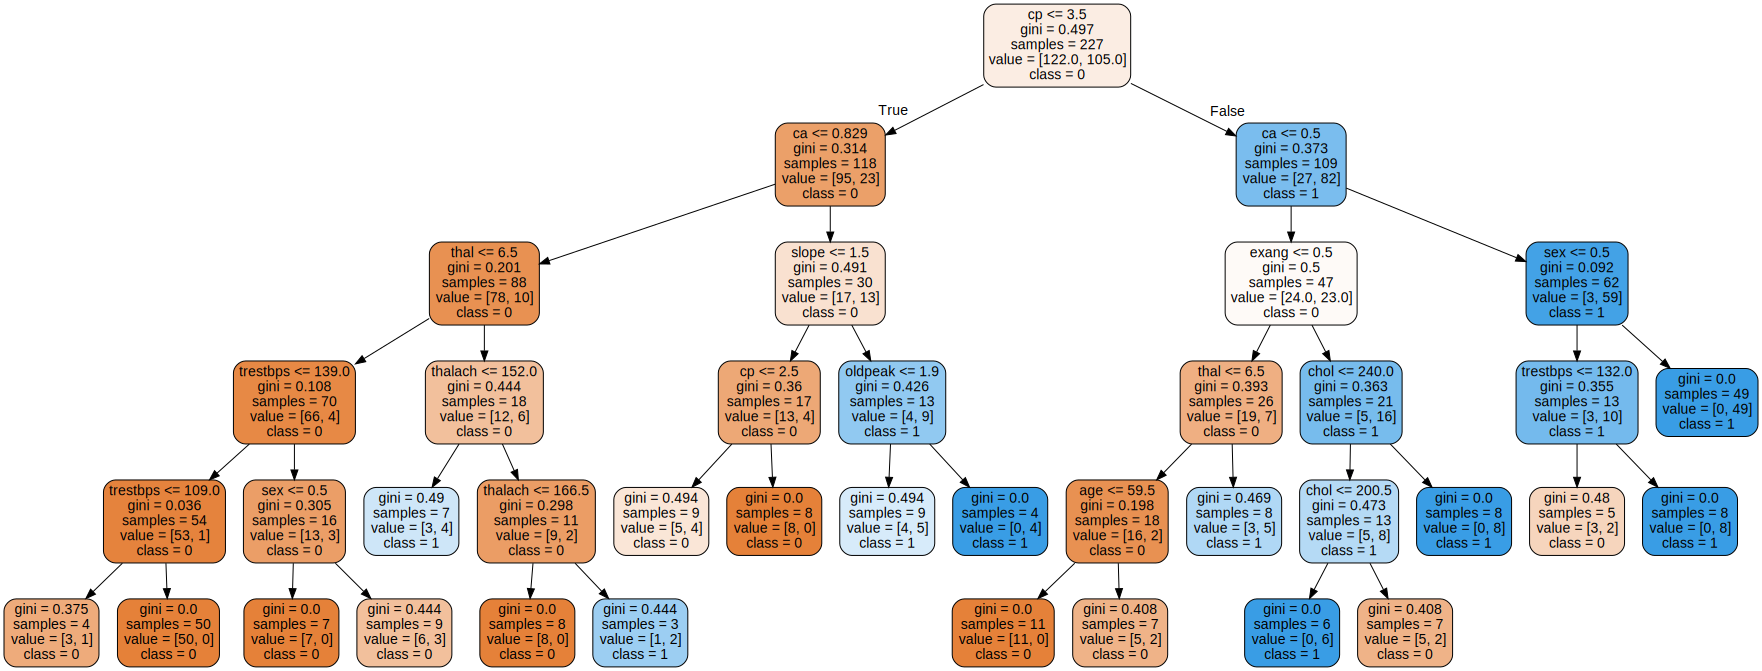

In [23]:
plot_data = export_graphviz(best_dt.named_steps['clf'],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

# **Explain hyperparameters**

In [24]:
# Get the best hyperparameters for each model
best_params_dt = gridcv_dt.best_params_
best_params_bagging = gridcv_bagging.best_params_
best_params_rf = gridcv_rf.best_params_

print("Decision Tree Best Hyperparameters:")
print(f"- Maximum depth of the tree (max_depth): {best_params_dt['clf__max_depth']} - This controls how deep the tree can grow. A deeper tree can capture more complex relationships but is prone to overfitting.")
print(f"- Minimum number of samples required to split an internal node (min_samples_split): {best_params_dt['clf__min_samples_split']} - This sets the minimum number of samples a node must contain before it can be split. Higher values prevent the tree from splitting on small groups of samples.")
print(f"- Minimum number of samples required to be at a leaf node (min_samples_leaf): {best_params_dt['clf__min_samples_leaf']} - This sets the minimum number of samples required in a leaf node. Higher values smooth the model and prevent overfitting.")
print("\n")

print("Bagged Decision Trees Best Hyperparameters:")
print(f"- Number of base estimators (n_estimators): {best_params_bagging['bagged_trees__n_estimators']} - This is the number of decision trees in the ensemble.")
print(f"- The number of samples to draw from X to train each base estimator (max_samples): {best_params_bagging['bagged_trees__max_samples']} - This determines the proportion of the training data used for training each individual tree. Values less than 1.0 mean sampling with replacement (bootstrapping).")
print(f"- The number of features to draw from X to train each base estimator (max_features): {best_params_bagging['bagged_trees__max_features']} - This determines the proportion of features considered when looking for the best split in each individual tree.")
print("\n")

print("Random Forest Best Hyperparameters:")
print(f"- The number of trees in the forest (n_estimators): {best_params_rf['rf__n_estimators']} - Similar to Bagging, this is the number of decision trees in the ensemble.")
print(f"- The maximum depth of the tree (max_depth): {best_params_rf['rf__max_depth']} - This limits the depth of each individual tree in the forest, helping to prevent overfitting.")
print(f"- The minimum number of samples required to be at a leaf node (min_samples_leaf): {best_params_rf['rf__min_samples_leaf']} - This sets the minimum number of samples required in a leaf node for each tree in the forest, smoothing the model.")

Decision Tree Best Hyperparameters:
- Maximum depth of the tree (max_depth): 5 - This controls how deep the tree can grow. A deeper tree can capture more complex relationships but is prone to overfitting.
- Minimum number of samples required to split an internal node (min_samples_split): 10 - This sets the minimum number of samples a node must contain before it can be split. Higher values prevent the tree from splitting on small groups of samples.
- Minimum number of samples required to be at a leaf node (min_samples_leaf): 3 - This sets the minimum number of samples required in a leaf node. Higher values smooth the model and prevent overfitting.


Bagged Decision Trees Best Hyperparameters:
- Number of base estimators (n_estimators): 150 - This is the number of decision trees in the ensemble.
- The number of samples to draw from X to train each base estimator (max_samples): 0.6 - This determines the proportion of the training data used for training each individual tree. Values less th

สรุป:

ผลการวิเคราะห์ข้อมูลที่สำคัญ:

*   โมเดล Decision Tree ที่ดีที่สุดได้คะแนน f1-macro 0.7625 และความแม่นยำ 0.7632 บนชุดทดสอบ ซึ่งได้มาจากไฮเปอร์พารามิเตอร์ที่ดีที่สุดคือ max_depth: 5, min_samples_split: 10, และ min_samples_leaf: 3
*   โมเดล Bagged Decision Trees ที่ดีที่สุดได้คะแนน f1-macro 0.8265 และความแม่นยำ 0.8289 บนชุดทดสอบ ซึ่งได้มาจากไฮเปอร์พารามิเตอร์ที่ดีที่สุดคือ n_estimators: 150, max_samples: 0.6, และ max_features: 0.6.
*   โมเดล Random Forest ที่ดีที่สุดได้คะแนน f1-macro 0.8522 และความแม่นยำ 0.8553 บนชุดทดสอบ ซึ่งได้มาจากไฮเปอร์พารามิเตอร์ที่ดีที่สุดคือ n_estimators: 50, max_depth: 10, และ min_samples_leaf: 5.

จากผลลัพธ์ที่ได้พบว่าโมเดล Random Forest ให้ผลการทำงานที่ดีที่สุด

ข้อมูลเชิงลึกหรือขั้นตอนต่อไป:

*   วิธี Ensemble (Bagging และ Random Forest) ปรับปรุงประสิทธิภาพอย่างมีนัยสำคัญเมื่อเทียบกับ Decision Tree เดี่ยวในชุดข้อมูลนี้

จากผลการทดลองพบว่า โมเดลที่ใช้เทคนิคการรวมหลายโมเดล (Ensemble Methods) เช่น Bagging และ Random Forest มีประสิทธิภาพดีกว่าโมเดล Decision Tree ตัวเดียวอย่างชัดเจน โดยดูจากคะแนนประเมินเช่น F1-score หรือ Accuracy

- Decision Tree เดี่ยว มีแนวโน้มจะ overfit ชุดข้อมูลฝึก
- Bagging (Bootstrap Aggregating) ลดความแปรปรวนของโมเดลโดยเฉลี่ยผลจากหลายๆ ต้นไม้ที่ฝึกจากข้อมูลสุ่ม
- Random Forest พัฒนาเพิ่มจาก Bagging โดยสุ่มเลือก subset ของฟีเจอร์ขณะสร้างแต่ละ node → ลดความสัมพันธ์ของต้นไม้ → ทำให้โมเดลมีความแม่นยำสูงขึ้นและ overfit น้อยลง

การวิเคราะห์เพิ่มเติมอาจเกี่ยวข้องกับการสำรวจช่วงของไฮเปอร์พารามิเตอร์ที่กว้างขึ้นสำหรับวิธี Ensemble หรือการตรวจสอบความสำคัญของคุณสมบัติจากโมเดล Random Forest ที่ดีที่สุด

- Random Forest สามารถให้ข้อมูลว่า ฟีเจอร์ใดในข้อมูลมีผลต่อการตัดสินใจมากที่สุด

- การวิเคราะห์นี้จะช่วยให้: เข้าใจกลไกของโมเดล , อาจช่วยตัดฟีเจอร์ที่ไม่สำคัญออก เพื่อทำให้โมเดลเบาขึ้น , เปิดโอกาสในการตีความเชิงธุรกิจหรือสาเหตุเชิงลึกจากข้อมูล

